In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json 
import glob
import seaborn as sns

category = {'Async Music':"Music", 'Boonji Project':"Image", 'Bored Ape Yacht Club':"Image",
            'VeeFriends':"Image", 'CryptoPunks':"Image", 'Doodles':"Image", 'EulerBeats Enigma':"Music",
            'EulerBeats Genesis':"Music", 'Cryptoblots by Dam Aggott-Hnsch':"Image",
            'JingleBe NFT COLLECTION':"Music", 'LOSTPOETS':"Image", 'NAMEWEE4896 Collection':"Music",
            'Nifty Sax Spheres':"Music", 'Rarible':"*Marketplace (Rarible/Superrare)", 'Song A Day':"Video", '"I\'m Spottie"':"Music",
            'SuperRare':"*Marketplace (Rarible/Superrare)", 'THE SHIBOSHIS':"Image"}


df = pd.DataFrame()

for json_files in glob.glob('data\preprocessed\json\*.json'):
    if not df.empty:
        temp = pd.read_json(json_files)
        if len(temp) == 2:
            temp.at[0,'media_filenames'] = [temp.iloc[0].media_filenames,temp.iloc[1].media_filenames]
        df = df.append(temp.head(1))
    else:
        temp = pd.read_json(json_files)
        if len(temp) == 2:
            temp.at[0,'media_filenames'] = [temp.iloc[0].media_filenames,temp.iloc[1].media_filenames]
        df = pd.DataFrame(temp.head(1))
df.fillna('',inplace=True)
df = df.astype({"name": str, "description": str, "collection_name": str, "collection_description":str})
df['Category'] = df['collection_name'].apply(lambda x: category.get(x))


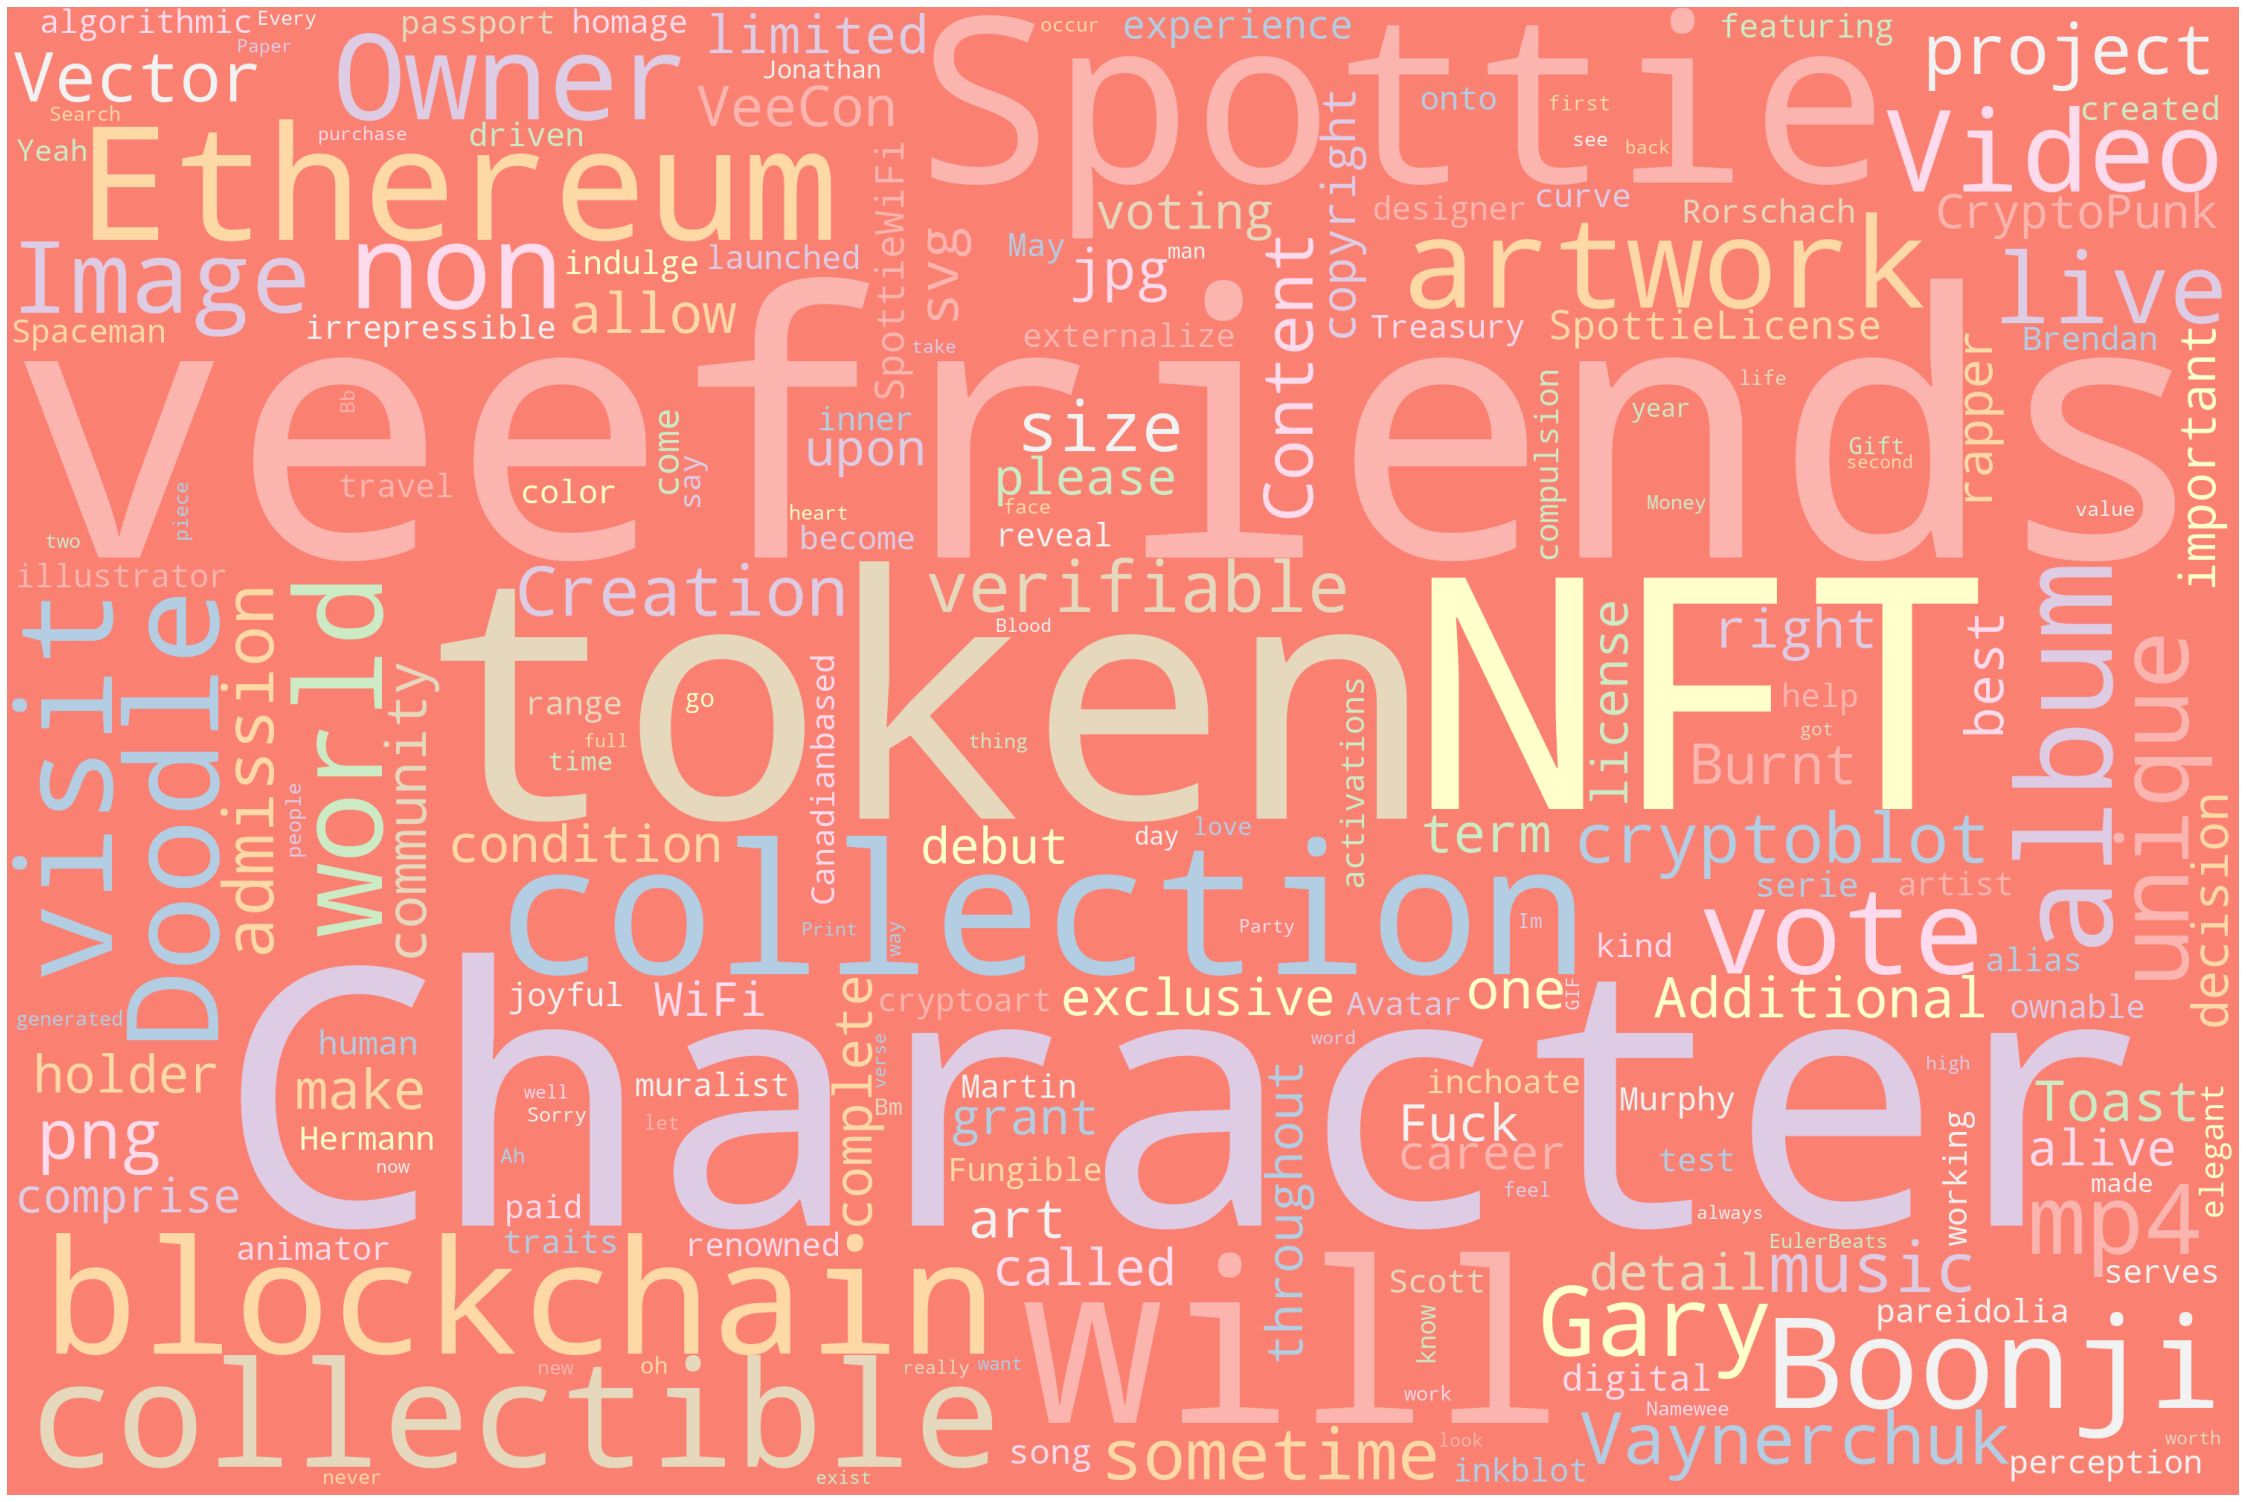

In [59]:
# Import package
import matplotlib.pyplot as plt
from os import path
from PIL import Image
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")

# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
# ' '.join(df.description).replace("https","").replace("f6pXbdBrDkgJjmSV","").replace("QXp2H6Yu0fLSCB0","").replace("XTrDCsS97","").replace("cdn","")
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(' '.join(df.description).replace("https","").replace("f6pXbdBrDkgJjmSV","").replace("QXp2H6Yu0fLSCB0","").replace("XTrDCsS97","").replace("cdn","")).to_file("description_wordcloud.pdf")
# Plot
plot_cloud(wordcloud)

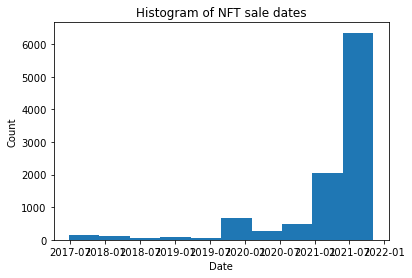

In [6]:
plt.hist(pd.to_datetime(df.transaction_time))
plt.title("Histogram of NFT sale dates")
plt.xlabel("Date")
plt.ylabel("Count")
plt.savefig('visualisations/Histogram_of_sale_dates.pdf')  

# Format Visualisation

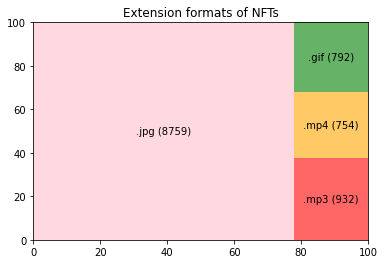

In [7]:
from collections import Counter
import squarify

contents = []

for key,values in df.media_filenames.iteritems():

    if len(values) == 2: 
        for i in values:
            contents.append(i[-4:])
    else: 
        contents.append(values[-4:])

counter = Counter(contents)
squarify.plot(label=[f"{k} ({v})" for k, v in counter.items()],sizes=counter.values(), alpha=0.6,color=("pink", "red", "orange", "green"))
plt.title("Extension formats of NFTs")
plt.savefig('visualisations/Extension_formats_of_NFTs.pdf')  
plt.show()
# fig = plt.figure(
#     FigureClass=Waffle, 
#     rows=1000, 
#     values=counter, 
#     colors=("#983D3D", "#232066", "#DCB732", "green"),
#     title={'label': 'Extension formats of NFTs', 'loc': 'left'},
#     labels=[f"{k} ({v})" for k, v in counter.items()],
#     legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(counter), 'framealpha': 0},
#     starting_location='NW',
#     block_arranging_style='snake'
# )
# fig.gca().set_facecolor('#EEEEEE')
# fig.set_facecolor('#EEEEEE')
# plt.show()
# plt.barh(list(counter.keys()),counter.values())
# plt.xlabel("Count")
# plt.ylabel("Extension")
# print(counter)

Text(0.5, 1.0, 'Categories of NFTs')

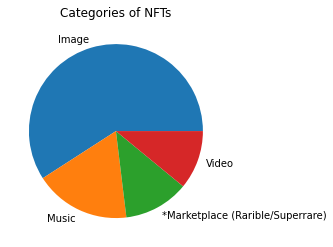

In [88]:
plt.pie(labels=df.Category.value_counts().keys(),x=df.Category.value_counts().values)
plt.title("Categories of NFTs")
plt.savefig('visualisations/Categories_of_NFTs.pdf')  


# Collection Visualisation

Text(0.5, 1.0, 'Distribution of Collections')

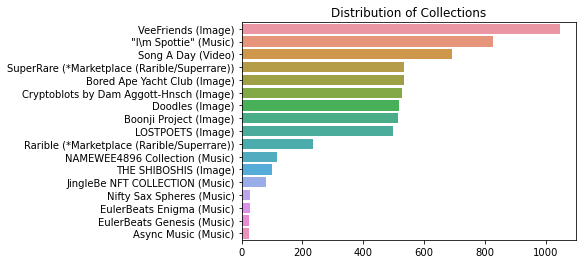

In [89]:
sns.barplot(y=[str(x).replace("(",'').replace("'",'').replace(", "," (").replace("place ","place (") for x in pd.DataFrame(zip(df.collection_name,df.Category)).value_counts().keys()],x=pd.DataFrame(zip(df.collection_name,df.Category)).value_counts().values,orient='h',hue_order=df.collection_name)
plt.title("Distribution of Collections")
plt.savefig('visualisations/Distribution of Collections.pdf',bbox_inches='tight')

C:\Users\cawin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


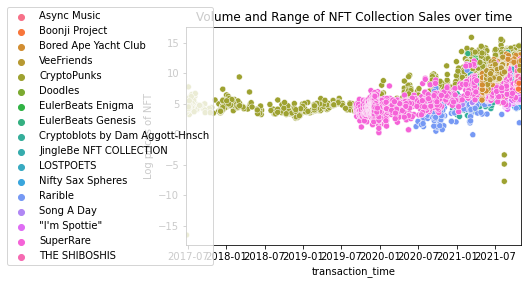

In [8]:
sns.scatterplot(df.transaction_time,np.log((df.eth_price*pd.to_numeric(df.usd_price)*10**(-float(df.eth_price_decimal.head(1))))),hue=(df.collection_name)).set(xlim=(df.transaction_time.min(),df.transaction_time.max()))
plt.title("Volume and Range of NFT Collection Sales over time")
plt.ylabel("Log prices of NFT")
plt.legend(loc='center left', bbox_to_anchor=(-0.55, 0.5), ncol=1)
plt.savefig('visualisations/Volume and Range of NFT Collection Sales over time.pdf',bbox_inches='tight')  

# Price Visualisation

Text(0.5, 0, 'Price of NFT')

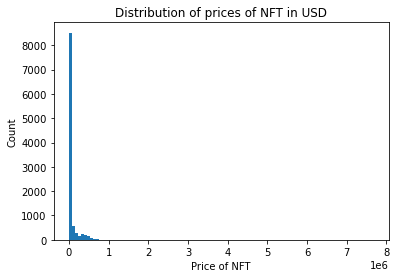

In [9]:
plt.hist((df.eth_price*pd.to_numeric(df.usd_price)*10**(-float(df.eth_price_decimal.head(1)))),bins='sqrt')
plt.title("Distribution of prices of NFT in USD")
plt.ylabel("Count")
plt.xlabel("Price of NFT")

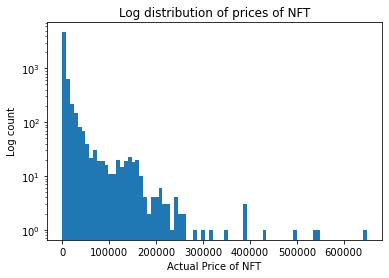

In [92]:
plt.hist((df.eth_price*pd.to_numeric(df.usd_price)*10**(-float(df.eth_price_decimal.head(1)))),log=True,bins='sqrt')
plt.title("Log distribution of prices of NFT")
plt.ylabel("Log count")
plt.xlabel("Actual Price of NFT")
plt.savefig('visualisations/Log_distribution_of_prices_of_NFT.pdf')  

C:\Users\cawin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


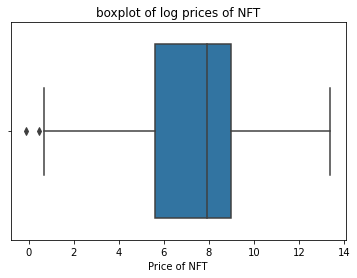

In [93]:
sns.boxplot(np.log(df.eth_price*pd.to_numeric(df.usd_price)*10**(-18)))
plt.title("boxplot of log prices of NFT")
plt.xlabel("Price of NFT")
plt.savefig('visualisations/boxplot_of_log_prices_of_NFT.pdf')  

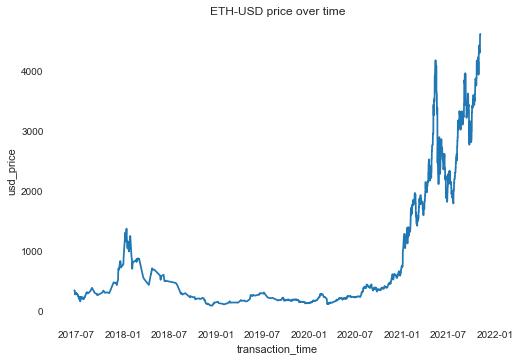

In [144]:
sns.lineplot(df.transaction_time,pd.to_numeric(df.usd_price))
plt.title("ETH-USD price over time")
plt.savefig('visualisations/ETH-USD_price_over_time.pdf')  

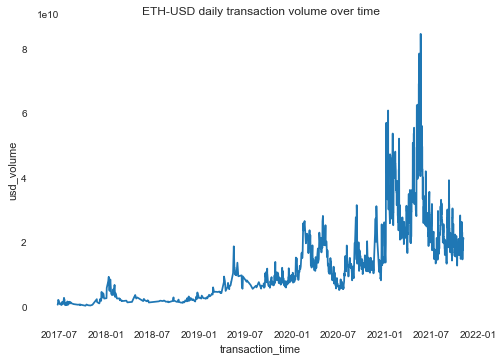

In [145]:
sns.lineplot(df.transaction_time,pd.to_numeric(df.usd_volume))
plt.title("ETH-USD daily transaction volume over time")
plt.savefig('visualisations/ETH-USD_daily_transaction_volume_over_time.pdf')  

C:\Users\cawin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


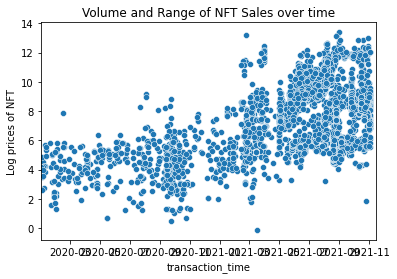

In [94]:
sns.scatterplot(df.transaction_time,np.log((df.eth_price*pd.to_numeric(df.usd_price)*10**(-float(df.eth_price_decimal.head(1)))))).set(xlim=(df.transaction_time.min(),df.transaction_time.max()))
plt.title("Volume and Range of NFT Sales over time")
plt.ylabel("Log prices of NFT")
plt.savefig('visualisations/Volume_and_Range_of_NFT_Sales_over_time.pdf')  

C:\Users\cawin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Log prices of NFT')

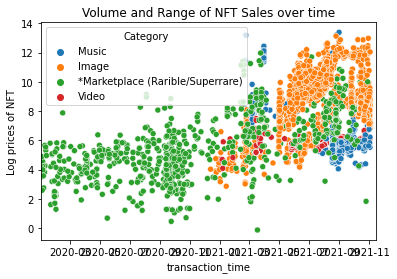

In [96]:
sns.scatterplot(df.transaction_time,np.log((df.eth_price*pd.to_numeric(df.usd_price)*10**(-float(df.eth_price_decimal.head(1))))),hue=(df.Category)).set(xlim=(df.transaction_time.min(),df.transaction_time.max()))
plt.title("Volume and Range of NFT Sales over time")
plt.ylabel("Log prices of NFT")
# plt.savefig('visualisations/Coloured_Volume_and_Range_of_NFT_Sales_over_time.pdf')  

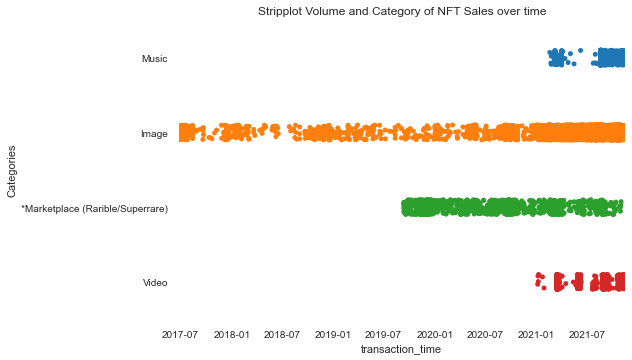

In [149]:
sns.stripplot(y=df.Category,x=df.transaction_time).set(xlim=(df.transaction_time.min(),df.transaction_time.max()))
plt.title("Stripplot Volume and Category of NFT Sales over time")
plt.ylabel("Categories")
plt.savefig('visualisations/Stripplot_Volume_and_Category_of_NFT_Sales_over_time.pdf')  

# Image and Video Data Visualisation

In [17]:
from PIL import Image
from collections import Counter
import cv2

image_resolution = Counter()
video_resolution = Counter()
video_fps = Counter()
video_duration = Counter()


Image.MAX_IMAGE_PIXELS = 1000000000 

def media_data_extractor(string, image_resolution, video_resolution, video_fps, video_duration):
    """ Finds the relevant media data

    Image: Resolution
    Video: Resolution, FPS and duration

    """
    file_path = string.replace('tmp/','')
    if file_path.endswith("jpg"):
        img = Image.open(file_path)
        wid, hgt = img.size
        image_resolution.update({f"({wid},{hgt})":1})
    if file_path.endswith('mp4'):
        cap=cv2.VideoCapture(file_path)
        try:
            fps = round(cap.get(cv2.CAP_PROP_FPS))
            video_fps.update({f"({fps})":1})
        except:
            print(f"{file_path} unable to find fps")
        try:
            width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
            height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
            video_resolution.update({f"({width},{height})":1})
        except:
            print(f"{file_path} unable to find resolution: {width},{height}")
        try:
            # rounded minute duration of each video
            duration = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))/float(cap.get(cv2.CAP_PROP_FPS))/60
            video_duration.update({duration:1})
        except:
            print(f"{file_path} unable to find duration")
    return image_resolution, video_resolution, video_fps, video_duration
    

for value in df.media_filenames:
    if len(value) == 2:
        for string in value:
            image_resolution, video_resolution, video_fps, video_duration = media_data_extractor(string,image_resolution, video_resolution, video_fps, video_duration)
    else:
        image_resolution, video_resolution, video_fps, video_duration = media_data_extractor(value,image_resolution, video_resolution, video_fps, video_duration)


In [82]:
def counter_to_graph(plotter,counter,column_name,title_name,min_count=20):

    temp_df = pd.DataFrame(list(counter.items()))
    temp_df.columns = [column_name,'Count']
    if column_name == 'Duration':
        temp_df = temp_df.groupby(pd.cut(temp_df[column_name], np.arange(0, temp_df[column_name].max() , 1))).count()
        temp_df.index = [z.replace(".0","")for z in [f"{y[0].strip()}-{y[1].strip()} mins" for y in [str(x).replace("(","").replace("]","").split(',') for x in temp_df.index]]]
        wedges, labels = plotter(x=temp_df["Count"],labels=temp_df.index)
        fix_labels(labels, sepfactor=1)
        labels = ['{0} - {1:1.1f} %'.format(i, j) for i, j in zip(temp_df.index,temp_df["Count"]/temp_df["Count"].sum()*100)]
        plt.legend(wedges, labels, loc='center left', bbox_to_anchor=(-0.35, .5), fontsize=8)
        plt.title(title_name)
        plt.tight_layout()

        return
    temp_df = temp_df.sort_values(['Count']).reset_index(drop=True)
    temp_df = temp_df.where(temp_df['Count'] >= min_count).dropna()

    if plotter == sns.barplot:
        plotter(temp_df["Count"],temp_df[column_name],orient='h')
    else:
        plotter(x=temp_df["Count"],labels=temp_df[column_name],autopct='%1.1f%%')
    plt.title(title_name)

def fix_labels(mylabels, tooclose=0.1, sepfactor=2):
    vecs = np.zeros((len(mylabels), len(mylabels), 2))
    dists = np.zeros((len(mylabels), len(mylabels)))
    for i in range(0, len(mylabels)-1):
        for j in range(i+1, len(mylabels)):
            a = np.array(mylabels[i].get_position())
            b = np.array(mylabels[j].get_position())
            dists[i,j] = np.linalg.norm(a-b)
            vecs[i,j,:] = a-b
            if dists[i,j] < tooclose:
                mylabels[i].set_x(a[0] + sepfactor*vecs[i,j,0])
                mylabels[i].set_y(a[1] + sepfactor*vecs[i,j,1])
                mylabels[j].set_x(b[0] - sepfactor*vecs[i,j,0])
                mylabels[j].set_y(b[1] - sepfactor*vecs[i,j,1])

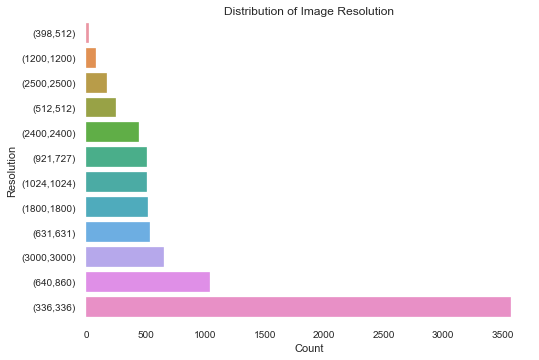

In [156]:
counter_to_graph(sns.barplot,image_resolution,column_name='Resolution',title_name='Distribution of Image Resolution',min_count=20)
plt.savefig('visualisations/Distribution_of_Image_Resolution.pdf')  

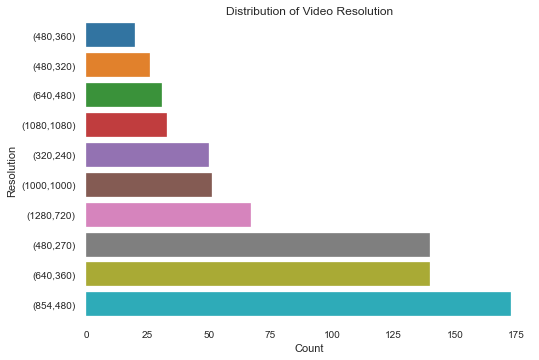

In [157]:
counter_to_graph(sns.barplot,video_resolution,column_name='Resolution',title_name='Distribution of Video Resolution',min_count=20)
plt.savefig('visualisations/Distribution_of_Video_Resolution.pdf') 

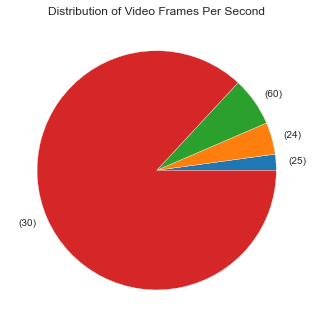

In [158]:
counter_to_graph(plt.pie,video_fps,column_name='Resolution',title_name='Distribution of Video Frames Per Second',min_count=3)
plt.savefig('visualisations/Distribution_of_Video_Frames_Per_Second.pdf') 

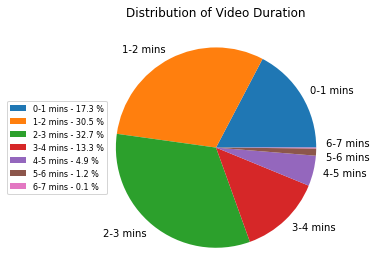

In [85]:
counter_to_graph(plt.pie,video_duration,column_name='Duration',title_name='Distribution of Video Duration',min_count=2)
plt.savefig('visualisations/Distribution_of_Video_Duration.pdf') 